In [16]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt


#plt.switch_backend('newbackend')  



dates = []
prices = []

In [17]:
def get_data(filename):
	with open(filename, 'r') as csvfile:
		csvFileReader = csv.reader(csvfile)
		next(csvFileReader)	# skipping column names
		for row in csvFileReader:
			dates.append(int(row[0].split('/')[2]))
			print((int(row[0].split('/')[2])))
			prices.append(float(row[1]))
	return

In [18]:
def predict_price(dates, prices):
	dates = np.reshape(dates,(len(dates), 1)) # converting to matrix of n X 1

	svr_lin = SVR(kernel= 'linear', C= 1e3)
#	svr_poly = SVR(kernel= 'poly', C= 1e3, degree= 2)
	svr_poly = SVR(kernel= 'poly', C= 1e3)
	svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1) # defining the support vector regression models
	svr_rbf.fit(dates, prices) # fitting the data points in the models
	svr_lin.fit(dates, prices)
	svr_poly.fit(dates, prices)

	plt.scatter(dates, prices, color= 'black', label= 'Data') # plotting the initial datapoints 
	plt.plot(dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') # plotting the line made by the RBF kernel
	plt.plot(dates,svr_lin.predict(dates), color= 'green', label= 'Linear model') # plotting the line made by linear kernel
	plt.plot(dates,svr_poly.predict(dates), color= 'blue', label= 'Polynomial model') # plotting the line made by polynomial kernel
	plt.xlabel('Date')
	plt.ylabel('Price')
	plt.title('Support Vector Regression')
	plt.legend()
	plt.show()

	#return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]
	return svr_rbf.predict, svr_lin.predict, svr_poly.predict

In [19]:
get_data('aapl.csv') # calling get_data method by passing the csv file to it

3
4
5
6
7
10
11
12
13
14
17
18
19
20
21
24
25
26
27
28
31


In [20]:
print(dates)
print(prices)
#print "Dates- ", dates
#print "Prices- ", prices

[3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 31]
[112.709999, 113.059998, 113.400002, 113.699997, 114.309998, 115.019997, 117.699997, 117.349998, 116.790001, 117.879997, 117.330002, 118.18, 117.25, 116.860001, 116.809998, 117.099998, 117.949997, 114.309998, 115.389999, 113.870003, 113.650002]


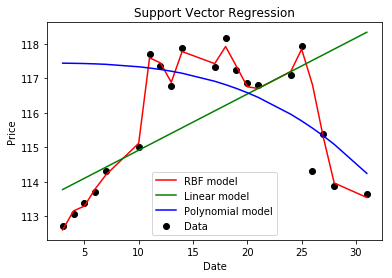

In [21]:
predicted_price = predict_price(dates, prices)